<a href="https://colab.research.google.com/github/oktaviacitra/data-mining/blob/main/Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import drive

# Connect to Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Dataset

In [ ]:
path = "/content/drive/MyDrive/Data Mining/transaction.csv"
dataset = pd.read_csv(path)
dataset

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland
...,...,...,...,...,...,...
10541,543911,21700,455,2/14/2011 12:46,17829,United Arab Emirates
10542,543911,22111,578,2/14/2011 12:46,17829,United Arab Emirates
10543,543911,22112,163,2/14/2011 12:46,17829,United Arab Emirates
10544,564428,23296,545,8/25/2011 11:27,17844,Canada


In [ ]:
data = dataset.loc[dataset['Country'] == 'Germany']
data = data.loc[:, ['Qty', 'Country', 'InvoiceDate']]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data = data.drop(columns=['InvoiceDate'])
data

,Qty,Country,Year,Month
1185,628,Germany,2011,5
1186,981,Germany,2011,5
1187,212,Germany,2011,5
1188,910,Germany,2011,5
1189,668,Germany,2011,5
...,...,...,...,...
8339,562,Germany,2011,9
8340,692,Germany,2011,9
8341,400,Germany,2011,9
8342,769,Germany,2011,11


# Accumulation

In [ ]:
totalQty = data.groupby('Month')[['Qty']].sum()
totalQty

,Qty
Month,
1,101266
2,37800
3,72084
4,60993
5,103749
6,79711
7,96423
8,120908
9,104487


# Visualization

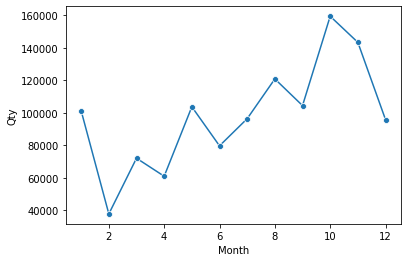

In [ ]:
sns.lineplot(data=totalQty, x='Month', y='Qty', marker="o")

# Linear Regression

In [ ]:
train_data = totalQty.index
train_data = np.array(x).reshape(-1,1)
train_label = totalQty['Qty'].values
test_data = np.array([1]).reshape(-1,1)

In [ ]:
linreg = LinearRegression()
linreg.fit(train_data, train_label)
predictions = linreg.predict(test_data)
predictions

array([63624.05128205])